In [2]:
## Import packages
from qutip import *
from qutip.piqs import *
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
font_size = 10
font_family = 'serif'
# Set Font Parameters
font = {'family': font_family, 'size': font_size}
plt.rc('font', **font)

In [2]:
#Dicke and photon spaces
N = 6
cav_dim = 20
system = Dicke(N)
nds = num_dicke_states(N)
I_tls = to_super(qeye(nds))
I_phot = to_super(qeye(cav_dim))

#System operators
[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jspin(N, "-")

a = destroy(cav_dim)

jz_tot = tensor(qeye(cav_dim), jz)
jpjm_tot = tensor(qeye(cav_dim), jp*jm)
nphot_tot = tensor(a.dag()*a, qeye(nds))

#Physical constants
wa = 1.45 #2 * np.pi * 1.45e3 # the cavity frequency (MHz)
wc = 1.45 #2 * np.pi * 1.45e3 # the spin transition frequency (MHz)
ge = 1.1 #2 * np.pi * 1.1 # the collective spin-photon coupling strength (MHz)
g = ge/np.sqrt(N) # the single spin-photon coupling strength (MHZ)
Kc = 0.18 #2 * np.pi * 0.18 # the cavity mode decay rate (MHz)
Ks = 0.11 #2 * np.pi * 0.11 # the spin dephasing rate (MHz)
gamma = 0.0177 #2 * np.pi * 0.0177 # the spin-lattice relaxation rate

#Initial states
rho0 = dicke(N, N/2, N/2)
rho0_phot = ket2dm(basis(cav_dim, 0)) # starting with zero photons in the cavity
rho0_tot = tensor(rho0_phot, rho0)



#gE = 0.1 #system emission (spin-lattice relaxation?)
#gD = 0.01 #system dephasing
#kappa = 1 #cavity decay
#ratio_g = 2
#g = ratio_g/np.sqrt(N)



In [3]:
#Hamiltonians
HA = wa * jz
system.hamiltonian = HA
HF = wc * a.dag() * a
HI = g * tensor(a + a.dag(), jx)

#Liouvillians
c_ops_phot = [np.sqrt(Kc) * a] # collapse operator (cavity decay)
system.emission = gamma 
system.dephasing = Ks

liouv = system.liouvillian() # TLS liouvillian
liouv_phot = liouvillian(HF, c_ops_phot) # photonic liouvilian
liouv_sum = super_tensor(liouv_phot, I_tls) + super_tensor(I_phot, liouv)
liouv_int = -1j* spre(HI) + 1j* spost(HI)
liouv_tot = liouv_sum + liouv_int # total liouvillian


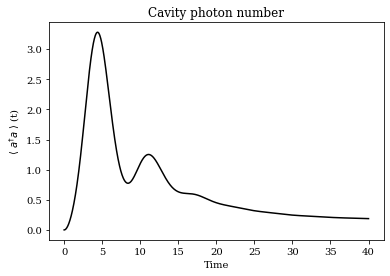

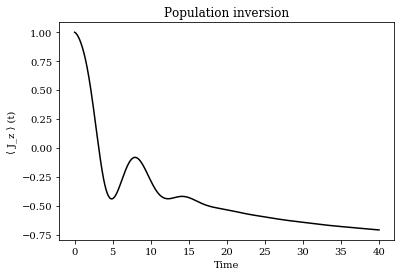

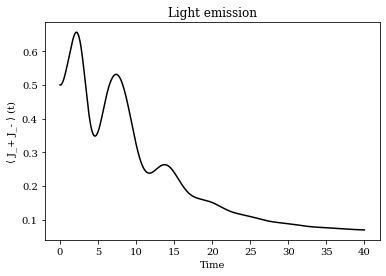

In [4]:
#Time evolution
time = 40
steps = 1000
tlist = np.linspace(0, time, steps)
result = mesolve(liouv_tot, rho0_tot, tlist, [], e_ops = [nphot_tot, jz_tot, jpjm_tot], options=Options(nsteps=10000))

adagat_tot = result.expect[0]
jzt_tot = result.expect[1]
jpjmt_tot = result.expect[2]


jmax = (N/2)
j2max = N/2*(N/2+1)

plt.figure(1)
plt.plot(tlist, adagat_tot, 'k', label='time evolution')
#plt.plot(tlist, nphot_ss, 'g--', label='steady state')
plt.title('Cavity photon number')
plt.xlabel('Time')
plt.ylabel('⟨ ${a^\dag}a$ ⟩ (t)')
#plt.legend(fontsize = label_size)

plt.figure(2)
plt.plot(tlist, jzt_tot/jmax, 'k', label='time evolution')
#plt.plot(tlist, jz_ss/jmax, 'g--', label='steady state')
plt.title('Population inversion')
plt.xlabel('Time')
plt.ylabel('⟨ J_z ⟩ (t)')
#plt.legend(fontsize = label_size)

plt.figure(3)
plt.plot(tlist, jpjmt_tot/j2max, 'k', label='time evolution')
#plt.plot(tlist, jpjm_ss/j2max, 'g--', label='steady state')
plt.title('Light emission')
plt.xlabel('Time')
plt.ylabel('⟨ J_+ J_- ⟩ (t)')
#plt.legend(fontsize = label_size)

plt.show()


In [ ]:
jx

In [ ]:
sigmax().unit()

In [ ]:
a = tensor(qeye(N), qeye(N))
b = to_super(qeye(N))
c = super_tensor(b, b) # does not work for (a, a)
c

In [9]:
dicke(4, 2, 2)

Quantum object: dims = [[9], [9]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]